In [1]:
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime

import matplotlib.pyplot as plt

from collections import defaultdict


%matplotlib inline
import json
plt.style.use('ggplot')

import seaborn as sns

from math import log10, floor

In [2]:
## Connect to local DB

client = MongoClient('localhost', 27017)
print ("Setup db access")

Setup db access


In [3]:
#
# Get collections from mongodb
#
#db = client.my_test_db
db = client.test


In [4]:
chunk = 100000
start = 0
end = start + chunk

In [5]:
#reponses = db.anon_student_task_responses.find({'correct':False})[start:end]
reponses = db.anon_student_task_responses.find()[start:end]

In [6]:
df_responses = pd.DataFrame(list(reponses))

In [7]:
print (df_responses.head())

                        _id               behavioral_traits  bonus  correct  \
0  5a00f1739100de1a390000d0                              []  False     True   
1  5a00f1739100de1a390000d5  [measuring_tools, orange_tick]  False     True   
2  5a00f1739100de1a390000d9                              []  False     True   
3  5a00f1739100de1a390000dc                              []  False     True   
4  5a00f1739100de1a390000df                              []  False     True   

       diff          id  incomplete         lesson  \
0  0.000000  nvrm82_9Yv       False       nline_1b   
1  0.563288  jVG3p9f-20       False       nline_1b   
2  0.601043  _NUUDSBMum       False  equivalence_0   
3  0.686276  B6HmMEMpoL       False  equivalence_0   
4  0.642014  IYWiIP26on       False  equivalence_0   

                                       level_summary  \
0  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
1  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
2  {'subject': 'fractions', 'uni

In [8]:
df_responses.shape

(100000, 27)

In [9]:
df2 = df_responses.join(pd.DataFrame(df_responses["student"].to_dict()).T)

In [10]:
df2 = df2.join(pd.DataFrame(df2['level_summary'].to_dict()).T)

In [11]:
df2 = df2.join(pd.DataFrame(df2['problems'].to_dict()).T)

In [12]:
df3  = df2.copy()

In [13]:
## Look act columns
print (df_responses.columns)

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched'],
      dtype='object')


In [14]:
## How many data samples
print (len(df_responses), "Number of entries")

100000 Number of entries


In [15]:
## Make 'description' a feature wih important words mapped

In [16]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong'],
      dtype='object')

In [17]:
df3['percent_prob_correct'] = df3['nright'].astype(float) / df3['ntotal']

In [18]:
df3.iloc[0]

_id                                              5a00f1739100de1a390000d0
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             nvrm82_9Yv
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_a/media/prob...
problem_set_id                                                 _Pd6uU3viE
problem_set_subspace                                                parta
qual_id                                       _Pd6uU3viE.parta.nvrm82_9Yv
randomly_selected                     

In [19]:
for idx in range(100):
    print ('index"', idx)
    print (df3.iloc[idx]['lesson'])
    print (df3.iloc[idx]['response'])

index" 0
nline_1b
{'fraction_cblock_chains': [{'right': 442, 'sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}, 'pieces': ['1/2'], 'left': 97, 'lcm_sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}}], 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}], 'den': '2', 'fraction_input_value': '1/2', 'num': '1', 'fraction_cblock_total_count': 1, 'numberline_associations': [[]], 'fraction_cblock_counts': {'1/2': 1}, 'fraction_cblock_containment': {}, 'whole': ''}
index" 1
nline_1b
{'fraction_cblock_total_count': 4, 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/panda.swf'}, {'total': 1

In [20]:
def stringify_response(resp):
    my_val = str(resp).replace("': ","_")
    my_val = my_val.replace("_{"," ")
    my_val = my_val.replace("_[",", ")
    for c in [']','[','{','}',"'","",","]:
        my_val = my_val.replace(c,'')
    return my_val


In [21]:
stringify_response(df3.iloc[0]['response'])

'fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_'

In [22]:
df3['response_str'] = df3['response'].apply(stringify_response)

In [23]:
for idx in range(20):
    print (idx, df3['response_str'].iloc[idx])

0 fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_
1 fraction_cblock_total_count_4 plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/objects/panda.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf input_4 fraction_cblock_chains right_856 sum numerator_1 denominator_1 __as3_type_Fraction pieces 1/4 1/4 1/4 1/4 left_165 lcm_sum numerator_4 denomina

In [24]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_prob_correct',
       'response_str'],
      dtype='object')

In [25]:
## In Response:
### convert K, V, and all K_V into words in a text doc
### Then add text
### The add description


In [26]:
def make_string_from_list(key, elem_list):
    # Append key to each item in list
    ans = ''
    for elem in elem_list:
        ans += key + '_' + elem 
        
        

        
    

def make_string(elem, key=None, top=True):
    ans = ''
    if not elem:
        return ans
    if top:
        top = False
        top_keys = []
        for idx in range(len(elem.keys())):
            top_keys.append(True)
            
    for idx, key in enumerate(elem.keys()):
        if top_keys[idx]:
            top = True
            top_keys[idx] = False
            ans += ' '
        else:
            top = False
        #print ('ans = ', ans)
        #print (type(elem[key]))
        if type(elem[key]) is str or\
                type(elem[key]) is int:
            #print ('add value', elem[key])
            value = str(elem[key])
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        elif type(elem[key]) is list:
            #print ('add list', elem[key])
            temp_elem = dict()
            for item in elem[key]:
                temp_elem[key] = item
                ans += make_string(temp_elem, top) 
        elif type(elem[key]) is dict:
            #print ('add dict', elem[key])
            for item_key in elem[key].keys():
                temp_elem = dict()
                temp_elem[item_key] = elem[key][item_key]
                ans += key + '_' + make_string(temp_elem, top)
        elif type(elem[key]) is float:
            #print ('add dict', elem[key])
            sig = 2
            value = elem[key]
            value = round(value, sig-int(
            floor(log10(abs(value))))-1)
            value = str(value)
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        # ans += ' ' + key + ' '
        #print ('not handled', elem[key])
     
        
    return ans
        
            
        
            
            

In [27]:
df3['response_doc'] = df3['response'].map(make_string)

In [28]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [29]:
# df3['response_doc'] = df3['response_doc'] + df3['txt'] 

In [30]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [31]:
# df3['response_doc'] = df3['response_doc'] +  df3['description']

In [32]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("\n", ""))

In [33]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("?", " "))

In [34]:
df3.iloc[100]['response_doc']

' radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf plain_image_groups_ total_1   '

In [35]:
df3.iloc[100]['response']

{'plain_image_groups': [{'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf'}],
 'radio_group_mc1': {'choice': 'B', 'text': 'No'},
 'radio_group_mc2': {'choice': 'A', 'text': 'Yes'}}

In [36]:
df3.iloc[100]

_id                                              5a00f1739100de1a390001fa
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                             0.304348
id                                                             Z3I2H8eOfO
incomplete                                                          False
lesson                                                      parts_whole_1
level_summary           {'subject': 'fractions', 'path': 'parts_whole_...
problem_set             lessons/fractions/lesson07/eq_parts/media/prob...
problem_set_id                                                 6nBHKepQ3Y
problem_set_subspace                                                 set2
qual_id                                        6nBHKepQ3Y.set2.Z3I2H8eOfO
randomly_selected                     

In [37]:
for idx in range(20):
    print (idx, df3['response_doc'].iloc[idx])

0   fraction_cblock_chains_ right_442 fraction_cblock_chains_ sum_ numerator_1 sum_ denominator_2 sum_ __as3_type_Fraction fraction_cblock_chains_  pieces_1/2 fraction_cblock_chains_ left_97 fraction_cblock_chains_ lcm_sum_ numerator_1 lcm_sum_ denominator_2 lcm_sum_ __as3_type_Fraction   plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/dog.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf  den_2  fraction_input_value_1/2  num_1  fraction_cblock_total_count_1    fraction_cblock_counts_ 1/2_1   whole_   
1  fraction_cblock_total_count_4   plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/n

In [38]:
df3['response_doc'] = df3['response_doc'].map( lambda x: " ".join(x.split('/')) if '/' in x else x)

In [39]:
df3.iloc[100]['response_doc']

' radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1   '

In [40]:
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace('[',' '))
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace(']',' '))

In [41]:
df3.iloc[100]['response_doc']

' radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1   '

In [42]:
docs = list(df3['response_doc'])

In [43]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [44]:
data_samples = docs

In [45]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 50
n_top_words = 20

In [46]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')

Extracting tf-idf features for NMF...


In [47]:
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


done in 7.029s.


In [48]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf features for LDA...
done in 6.770s.


In [49]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 100
n_top_words = 30

In [50]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 6.977s.
Extracting tf features for LDA...
done in 6.615s.


In [51]:

from sklearn.cluster import KMeans, MiniBatchKMeans
true_k = 100

km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000)

In [52]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(tf)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in 1.510s



In [53]:
print("Top terms per cluster:")


order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: numberline_associations_ whole_ input_a_ input_ fraction_input_value_1 num_1 image_object_groups_ num_2 fraction_input_value_2 fraction_input_value_ fraction pos_value_0 12 num_3 bitmap_text_interp_ bitmap_text_inputs_ 10 den_8 fraction_input_value_3 fraction_cblock_chains_ den_6 pos_value_1 num_4 den_4 fraction_input_value_4 den_5 15 num_5 fraction_input_value_5 den_15
Cluster 1: fraction_cblock_chains_ lcm_sum_ sum_ pieces_1 __as3_type_fraction numerator_1 fraction_cblock_counts_ fraction denominator_1 left_176 denominator_2 denominator_8 fraction_cblock_containment_ denominator_6 piece0_ denominator_3 numerator_2 1_1 2_ denominator_4 3_ right_866 4_ right_521 15 12 numerator_3 numerator_4 2_1 piece1_
Cluster 2: fraction_cblock_chains_ input_ input_a_ lcm_sum_ sum_ __as3_type_fraction numerator_1 denominator_2 pieces_1 fraction denominator_1 bar1_ 2_ 1_ fraction_cblock_containment_ right_445 left_130 left_100 fraction_cblock_counts_ right_475 fractio

In [54]:
len(km.labels_)

100000

In [55]:
np.bincount(km.labels_)

array([ 5623,   800,     0,  1831,  3827,   234,  1475,   199,   580,
         626,    97,   753,   644,  1287,   439,   730,   377,   555,
         447,   383,   209,    17,     0,  1750,   700,   316,  1557,
         114,   949,   482,   315,   639,  1006,   859,   823,   576,
         887,  1054,   214,     0,  1576,   485,   209,   494,  1095,
          83,   116,     3,   717,  1006,   780,  2703,   468,   707,
        2472,  2225,   199,  1372,   508,   386,   945,   101,   486,
         430,    37,  1202,  2623,  3621,   713,   153,   729,     0,
        4378,    79,   343,   156,     0,   292,   829,  1840,  1316,
         676,     0,   601,  1158,   618,   459,   603,   180, 19995,
         121,   353,   583,   203,   385,   183,   710,   779,   494,   648])

In [56]:
df3['cluster_100'] = km.labels_

In [57]:
len(np.bincount(km.labels_))

100

In [58]:
df3.shape

(100000, 61)

In [59]:
df3['cluster_100'] = km.labels_


In [60]:
df3['trait_1'] = df3['behavioral_traits'].apply(lambda x : x[0] if len(x) > 0 else 'None' )

In [61]:
df3['trait_2'] = df3['behavioral_traits'].apply(lambda x : x[1] if len(x) > 1 else 'None' ) 

In [62]:
df3['trait_1'].value_counts()

None                             71238
how_to_model                      5348
inverts_numerator_denominator     4638
identifying_gt_lt                 2806
deci_understanding_gt_lt          1425
recognizing_the_whole             1307
deci_incorrect_inequality         1282
starting_from_0_nline             1047
dragging_to_add                    956
counting_hops_not_ticks            892
inequality_symbol                  788
partially_drawn_parts              680
modeled_incorrect_comparison       673
comparing_frac_gt_lt               542
misplaced_fraction_part_nline      480
measuring_tools                    459
deci_placing_decimal_points        408
partitioning_number_line           398
nline_as_whole                     325
deci_tens_vs_tenths                317
simplifying_mixed_numbers          292
simplify_with_common_denom         289
simplifying_bars_2                 280
deci_forgot_decimal_point          274
deci_hops_instead_ticks            274
deci_hundredths_vs_tenths

In [63]:
df3['trait_2'].value_counts()

None                            95784
simplifying_mixed_numbers         835
equally_sized_parts               680
modeled_incorrect_numerator       673
orange_tick                       459
simplifying_answers_nline         421
wrong_number_parts                398
dragging_to_add_3_circles         292
deci_break_tenths_hundredths      236
nline_restart_one                 214
modulo_ans                          8
Name: trait_2, dtype: int64

In [64]:
df_cluster_100 = df3.groupby('cluster_100')

In [65]:
len(df_cluster_100)

94

In [68]:
#df_cluster_100.head()

,_id,behavioral_traits,bonus,correct,diff,id,incomplete,lesson,level_summary,problem_set,...,nright,ntotal,nuntouched,nwrong,percent_prob_correct,response_str,response_doc,cluster_100,trait_1,trait_2
0,5a00f1739100de1a390000d0,[],False,True,0.000000,nvrm82_9Yv,False,nline_1b,"{'entered': True, 'path': 'nline_1b', 'lm_stat...",lessons/fractions/lesson13_1/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains right_442 sum numerator...,fraction_cblock_chains_ right_442 fraction_c...,95,None,None
1,5a00f1739100de1a390000d5,"[measuring_tools, orange_tick]",False,True,0.563288,jVG3p9f-20,False,nline_1b,"{'entered': True, 'path': 'nline_1b', 'lm_stat...",lessons/fractions/lesson13_1/part_b/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_total_count_4 plain_image_grou...,fraction_cblock_total_count_4 plain_image_g...,15,measuring_tools,orange_tick
2,5a00f1739100de1a390000d9,[],False,True,0.601043,_NUUDSBMum,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains left_176 lcm_sum numera...,fraction_cblock_chains_ left_176 fraction_cb...,60,None,None
3,5a00f1739100de1a390000dc,[],False,True,0.686276,B6HmMEMpoL,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains left_176 lcm_sum numera...,fraction_cblock_chains_ left_176 fraction_cb...,1,None,None
4,5a00f1739100de1a390000df,[],False,True,0.642014,IYWiIP26on,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_b/media/prob...,...,9,9,0,0,1.000000,fraction_circle_containment Fraction 1/2 lcm_s...,fraction_circle_containment_ Fraction 1 2_ ...,63,None,None
5,5a00f1739100de1a390000e2,[],False,True,0.000000,bUoNJIVgJi,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson12/sets_large/media/pr...,...,1,4,1,3,0.250000,image_object_groups total_6 on_3 url_assets/ob...,image_object_groups_ total_6 image_object_gr...,79,None,None
6,5a00f1739100de1a390000e7,[],False,False,0.284006,39Y1vECA2c,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson10/quarters_ab/quarter...,...,1,4,1,3,0.250000,None,,89,None,None
7,5a00f1739100de1a390000ea,[],False,False,0.168491,faYl5HT_Sn,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson11/thirds/media/proble...,...,0,3,4,3,0.000000,None,,89,None,None
8,5a00f1739100de1a390000ed,[],False,True,0.397506,jzC49--8x7,False,model_symbol_6,"{'type': 'lesson', 'mastery': {'mean': 0.78899...",lessons/fractions/lesson08_3/part_a/media/prob...,...,8,8,0,0,1.000000,fraction_circle_groups x_512 scale_1 chains pi...,fraction_circle_groups_ x_512 fraction_circl...,40,None,None
9,5a00f1739100de1a390000f0,[],False,True,1.000000,hxS1eqLik1,False,model_symbol_6,"{'type': 'lesson', 'mastery': {'mean': 0.78899...",lessons/fractions/lesson08_3/part_b/media/prob...,...,8,8,0,0,1.000000,fraction_circle_groups x_512 scale_0.999999999...,fraction_circle_groups_ x_512 fraction_circl...,63,None,None


In [69]:
df_pcorrect = df3['percent_prob_correct'].groupby(df3['cluster_100']).describe()

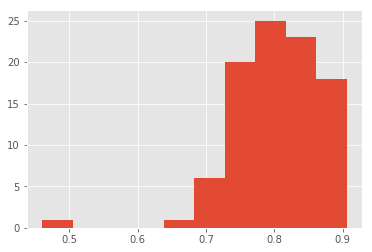

In [70]:
df_pcorrect['mean'].hist()

In [71]:
df_correct = df3['correct'].groupby(df3['cluster_100']).mean()

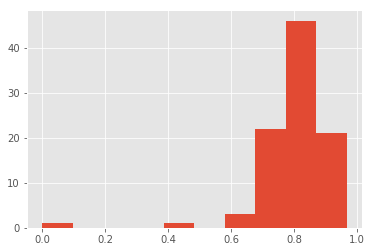

In [72]:
df_correct.hist()

In [75]:
df_true = df3[df3['correct']==True]
df_correctx_true = df_true['percent_prob_correct']

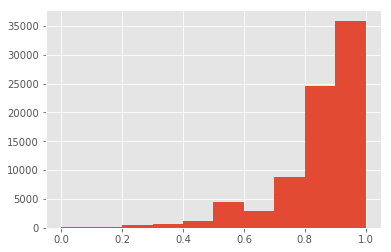

In [76]:
df_correctx_true.hist()

In [79]:
df_false = df3[df3['correct']!=True]
df_correctx_false = df_false['percent_prob_correct']

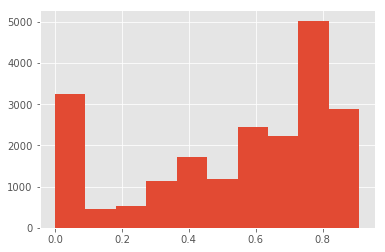

In [80]:
df_correctx_false.hist()

In [81]:
df_trait_1 = df3.groupby(['cluster_100', 'trait_1']).size().unstack(fill_value=0)

In [82]:
df_trait_2 = df3.groupby(['cluster_100', 'trait_2']).size().unstack(fill_value=0)

In [83]:
df_trait_2

trait_2,None,deci_break_tenths_hundredths,dragging_to_add_3_circles,equally_sized_parts,modeled_incorrect_numerator,modulo_ans,nline_restart_one,orange_tick,simplifying_answers_nline,simplifying_mixed_numbers,wrong_number_parts
cluster_100,,,,,,,,,,,
0,5614,0,0,0,0,8,0,0,1,0,0
1,799,0,0,0,0,0,0,1,0,0,0
3,1831,0,0,0,0,0,0,0,0,0,0
4,3440,0,0,0,0,0,0,0,0,0,387
5,234,0,0,0,0,0,0,0,0,0,0
6,1474,0,0,0,0,0,0,1,0,0,0
7,185,0,0,0,13,0,0,1,0,0,0
8,579,0,0,0,1,0,0,0,0,0,0
9,439,0,178,0,0,0,0,0,0,9,0


In [84]:
df_trait_2.columns

Index(['None', 'deci_break_tenths_hundredths', 'dragging_to_add_3_circles',
       'equally_sized_parts', 'modeled_incorrect_numerator', 'modulo_ans',
       'nline_restart_one', 'orange_tick', 'simplifying_answers_nline',
       'simplifying_mixed_numbers', 'wrong_number_parts'],
      dtype='object', name='trait_2')

In [85]:
df_trait_1.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [86]:
[x for x in df_trait_2.columns if x not in df_trait_1.columns ]

['dragging_to_add_3_circles',
 'equally_sized_parts',
 'modeled_incorrect_numerator',
 'modulo_ans',
 'nline_restart_one',
 'orange_tick',
 'simplifying_answers_nline',
 'wrong_number_parts']

In [87]:
[x for x in df_trait_1.columns if x not in df_trait_2.columns ]

['area_model',
 'benchmark_1_2',
 'benchmark_quarters',
 'comparing_frac_gt_lt',
 'counting_hops_for_division',
 'counting_hops_not_ticks',
 'deci_add_to_model',
 'deci_building_tenths',
 'deci_compare_no_models',
 'deci_forgot_decimal_point',
 'deci_hops_instead_ticks',
 'deci_hundredths_vs_tenths',
 'deci_incorrect_inequality',
 'deci_placing_decimal_points',
 'deci_point_location_correct',
 'deci_tens_vs_tenths',
 'deci_understanding_gt_lt',
 'determine_the_frac_part',
 'dragging_to_add',
 'fraction_of_set',
 'hops_vs_ticks',
 'how_to_model',
 'identifying_gt_lt',
 'inequality_symbol',
 'inverts_numerator_denominator',
 'measuring_tools',
 'misplaced_fraction_part_nline',
 'mixed_number_quotient',
 'mixed_numbers_on_number_line',
 'modeled_incorrect_comparison',
 'modeling_fraction_division',
 'multiplication',
 'multiplying_whole_by_proper',
 'nline_as_whole',
 'numerator_off_by_one_nline',
 'only_tenths_entered',
 'partially_drawn_parts',
 'partitioning_number_line',
 'recognizing

In [88]:
#df_trait_1 = df_trait_1.drop('None', axis=1)
#df_trait_2 = df_trait_2.drop('None', axis=1)

In [89]:
df_traits = pd.merge(left=df_trait_1,right=df_trait_2, how='left' )


In [90]:
df_trait_1.index.rename('cluster_100', inplace=True)

In [91]:
df_trait_2.index.rename('cluster_100', inplace=True)

In [92]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [93]:
df_traits = pd.concat([df_trait_1, df_trait_2], axis=1)

In [94]:
print (df_traits.shape)
print (df_trait_1.shape)
print (df_trait_2.shape)


(94, 62)
(94, 51)
(94, 11)


In [95]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [96]:
df_traits = df_traits.groupby(df_traits.columns, axis=1).sum()

In [97]:
df_traits

,None,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,8080,0,0,0,0,0,0,0,0,0,...,0,9,0,1,0,0,0,0,0,0
1,1584,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2548,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4637,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,387
5,268,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2938,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7,361,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1158,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,719,0,0,0,0,0,0,0,0,0,...,0,0,187,1,38,0,0,0,0,0


In [98]:
df_traits = df_traits.drop('None', axis=1)

In [99]:
df_traits

,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,deci_compare_no_models,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,9,0,1,0,0,0,0,0,0
1,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,387
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,187,1,38,0,0,0,0,0


In [100]:
import seaborn as sns

In [101]:
df_traits_dict = df_traits.to_dict()

In [102]:
df_traits_dict_cluster = df_traits.transpose().to_dict()

In [103]:
df_traits_dict_cluster_no0 = {}
for cluster, trait_dict in df_traits_dict_cluster.items():
    # print (cluster, trait_dict)
    df_traits_dict_cluster_no0[cluster] = { k:v for k,v in trait_dict.items() if v != 0}

In [104]:
df_traits_dict_cluster_no0[88]

{'inequality_symbol': 4,
 'inverts_numerator_denominator': 7,
 'measuring_tools': 3,
 'modeled_incorrect_comparison': 1,
 'modeled_incorrect_numerator': 1,
 'orange_tick': 3}

In [105]:
df_traits_dict_cluster_no0[40]

{'determine_the_frac_part': 8,
 'dragging_to_add': 9,
 'how_to_model': 285,
 'inequality_symbol': 4,
 'inverts_numerator_denominator': 3,
 'recognizing_the_whole': 23,
 'simplifying_fractions': 3,
 'simplifying_mixed_numbers': 8,
 'simplifying_mixed_numbers_2': 2}

In [106]:
print (sorted(list(df_traits.columns)))

['area_model', 'benchmark_1_2', 'benchmark_quarters', 'comparing_frac_gt_lt', 'counting_hops_for_division', 'counting_hops_not_ticks', 'deci_add_to_model', 'deci_break_tenths_hundredths', 'deci_building_tenths', 'deci_compare_no_models', 'deci_forgot_decimal_point', 'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths', 'deci_incorrect_inequality', 'deci_placing_decimal_points', 'deci_point_location_correct', 'deci_tens_vs_tenths', 'deci_understanding_gt_lt', 'determine_the_frac_part', 'dragging_to_add', 'dragging_to_add_3_circles', 'equally_sized_parts', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model', 'identifying_gt_lt', 'inequality_symbol', 'inverts_numerator_denominator', 'measuring_tools', 'misplaced_fraction_part_nline', 'mixed_number_quotient', 'mixed_numbers_on_number_line', 'modeled_incorrect_comparison', 'modeled_incorrect_numerator', 'modeling_fraction_division', 'modulo_ans', 'multiplication', 'multiplying_whole_by_proper', 'nline_as_whole', 'nline_restart_one', 'numer

In [107]:
temp = (sorted(list(df_traits.columns)))
for idx, x in enumerate(temp):
    if idx > 0:
        if x == temp[idx - 1]:
            print (x)

In [108]:
#df_traits_norm = (df_traits - df_traits.mean()) / (df_traits.max() - df_traits.min())
df_traits_norm = (df_traits  / (df_traits.sum()) )

In [109]:
df_traits_norm = df_traits_norm.applymap( lambda x: 0 if x < 0 else x)

In [110]:
df_traits_norm

,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,deci_compare_no_models,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.088235,0.000000,0.008772,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,0.0,0.0,0.0,0.005535,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.008772,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.972362
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,0.0,0.0,0.0,0.001845,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.003571,0.000000,0.000000,0.008772,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.006289,...,0.000000,0.000000,0.165927,0.008772,0.197917,0.000000,0.000000,0.00,0.000000,0.000000


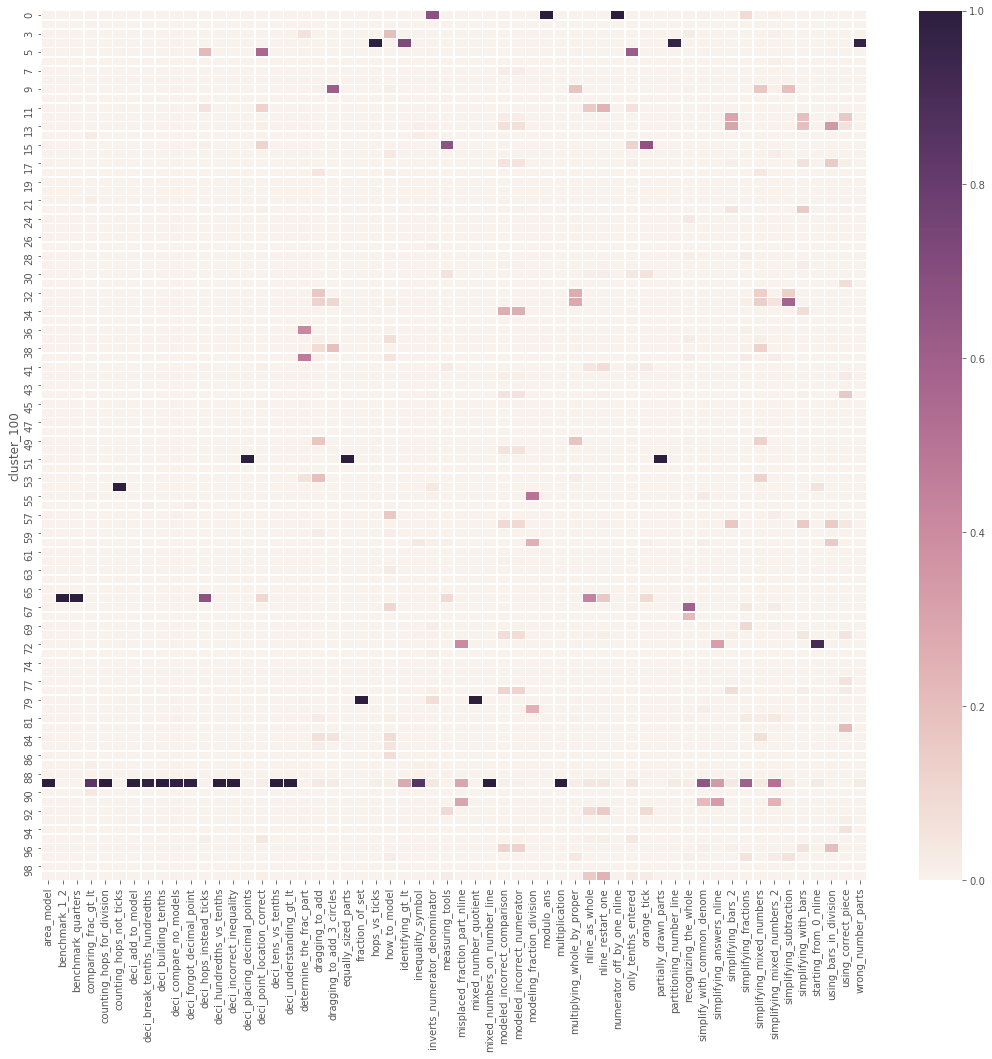

In [111]:
fig = plt.figure(figsize=(18.5, 16))
cmap = sns.cubehelix_palette(light=.95, as_cmap=True)
sns.heatmap(df_traits_norm, cmap=cmap,  linewidths=.5)

#sns.heatmap(df_traits_norm, cmap="YlGnBu",  linewidths=.5)

In [112]:
df_traits_norm.shape

(94, 58)

In [113]:
fig.savefig('heat_map2.png')


In [114]:

#df_traits.plot.bar(stacked=True, figsize=(18.5, 16), legend=False)

In [115]:
df_traits.to_csv('cluster_100.csv')

In [118]:
df_traits2 = pd.concat([df3['percent_prob_correct'].groupby(df3['cluster_100']).describe(), df_traits], axis=1)

In [119]:
df_traits2.to_csv('cluster_100_plus_correct.csv')

In [120]:
df_traits_dict = df_traits.to_dict(orient='dict')

In [121]:
df_traits_dict

{'area_model': {0: 0,
  1: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 0,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 0,
  55: 0,
  56: 0,
  57: 0,
  58: 0,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 0,
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  77: 0,
  78: 0,
  79: 0,
  80: 0,
  81: 0,
  83: 0,
  84: 0,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 16,
  90: 0,
  91: 0,
  92: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 0,
  97: 0,
  98: 0,
  99: 0},
 'benchmark_1_2': {0: 0,
  1: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16

In [122]:
df_traits_dict2 = {}
cluster_with_no_trait = list(np.arange(100))
cluster_with_lt_10_trait = list(np.arange(100))

In [123]:
for trait in df_traits_dict:
    #print (idx, trait)
    df_traits_dict2[trait] = {}
    for cluster in df_traits_dict[trait]:
        #print (trait, cluster, df_traits_dict[trait][cluster])
        if  df_traits_dict[trait][cluster] > 0:
            df_traits_dict2[trait][cluster] = df_traits_dict[trait][cluster]
            if cluster in cluster_with_no_trait:
                cluster_with_no_trait.remove(cluster)
            if  df_traits_dict[trait][cluster] > 9:
                if cluster in cluster_with_lt_10_trait:
                    cluster_with_lt_10_trait.remove(cluster)

In [124]:
print (df_traits_dict2)

{'area_model': {89: 16}, 'benchmark_1_2': {66: 8}, 'benchmark_quarters': {66: 66}, 'comparing_frac_gt_lt': {1: 3, 6: 1, 10: 1, 14: 13, 21: 8, 25: 2, 26: 1, 29: 1, 37: 2, 44: 4, 52: 1, 55: 6, 60: 4, 63: 1, 70: 2, 80: 2, 87: 8, 89: 457, 90: 25}, 'counting_hops_for_division': {89: 36}, 'counting_hops_not_ticks': {54: 886, 89: 6}, 'deci_add_to_model': {89: 113}, 'deci_break_tenths_hundredths': {56: 5, 89: 250}, 'deci_building_tenths': {89: 46}, 'deci_compare_no_models': {9: 1, 57: 1, 81: 1, 89: 156}, 'deci_forgot_decimal_point': {56: 5, 89: 269}, 'deci_hops_instead_ticks': {5: 61, 11: 16, 13: 1, 15: 3, 41: 2, 66: 184, 78: 1, 89: 2, 95: 4}, 'deci_hundredths_vs_tenths': {89: 244}, 'deci_incorrect_inequality': {89: 1282}, 'deci_placing_decimal_points': {51: 405, 89: 3}, 'deci_point_location_correct': {5: 58, 11: 13, 13: 1, 15: 12, 23: 1, 41: 1, 45: 1, 66: 11, 89: 2, 95: 4, 99: 1}, 'deci_tens_vs_tenths': {89: 317}, 'deci_understanding_gt_lt': {89: 1425}, 'determine_the_frac_part': {3: 1, 36: 7

In [125]:
cluster_with_no_trait, 

([2, 20, 22, 39, 43, 46, 48, 71, 74, 76, 82],)

In [126]:
len(cluster_with_no_trait)

11

In [127]:
len(cluster_with_lt_10_trait)

34

In [128]:
x = list(df_traits.index)

In [129]:
df_traits.shape

(94, 58)

In [130]:
y = df_traits.sum(axis=1)

In [131]:
y

cluster_100
0     3166
1       16
3     1114
4     3017
5      200
6       12
7       37
8        2
9      533
10       6
11     141
12     174
13     281
14      78
15     641
16     176
17     114
18     170
19       1
20       0
21      10
23      83
24      59
25      17
26      15
27      93
28      50
29      24
30      69
31      13
      ... 
67    1351
68     278
69      91
70     164
72    1282
73      64
74       0
75       1
77      10
78     236
79     587
80      21
81     139
83      28
84     618
85     305
86     408
87      55
88      19
89    7365
90      25
91     372
92     152
93       7
94      21
95      19
96     223
97     170
98       5
99     133
Length: 94, dtype: int64

<Container object of 94 artists>

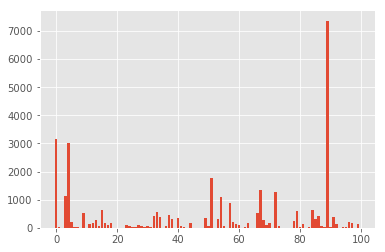

In [132]:

plt.bar( x, y)


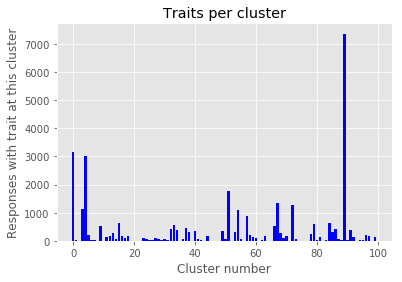

In [133]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster')
ax.set_title('Traits per cluster')



In [134]:
counts_per_cluster = np.bincount(km.labels_)

In [135]:
print (counts_per_cluster)

[ 5623   800     0  1831  3827   234  1475   199   580   626    97   753
   644  1287   439   730   377   555   447   383   209    17     0  1750
   700   316  1557   114   949   482   315   639  1006   859   823   576
   887  1054   214     0  1576   485   209   494  1095    83   116     3
   717  1006   780  2703   468   707  2472  2225   199  1372   508   386
   945   101   486   430    37  1202  2623  3621   713   153   729     0
  4378    79   343   156     0   292   829  1840  1316   676     0   601
  1158   618   459   603   180 19995   121   353   583   203   385   183
   710   779   494   648]


In [136]:
counts_per_cluster = list(counts_per_cluster)

In [137]:
counts_per_cluster = [x for x in counts_per_cluster if x != 0]

In [138]:
counts_per_cluster = np.array(counts_per_cluster)

In [139]:
y1 = y / counts_per_cluster

In [140]:
y

cluster_100
0     3166
1       16
3     1114
4     3017
5      200
6       12
7       37
8        2
9      533
10       6
11     141
12     174
13     281
14      78
15     641
16     176
17     114
18     170
19       1
20       0
21      10
23      83
24      59
25      17
26      15
27      93
28      50
29      24
30      69
31      13
      ... 
67    1351
68     278
69      91
70     164
72    1282
73      64
74       0
75       1
77      10
78     236
79     587
80      21
81     139
83      28
84     618
85     305
86     408
87      55
88      19
89    7365
90      25
91     372
92     152
93       7
94      21
95      19
96     223
97     170
98       5
99     133
Length: 94, dtype: int64

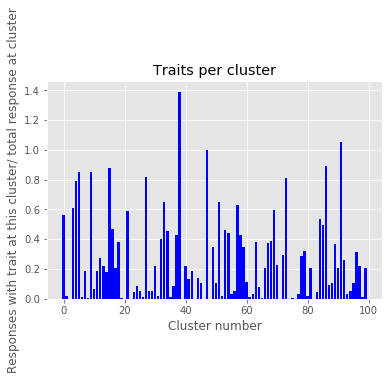

In [141]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y1, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster/ total response at cluster')
ax.set_title('Traits per cluster')

In [142]:
df_traits2p = df_traits2.copy()

In [143]:
df_traits2p['num_correct_true'] = df3.groupby('cluster_100')['correct'].apply(lambda x: (x==True).sum())

In [144]:
df_traits2p['percent_correct_true'] = (df_traits2p['num_correct_true']/df_traits2p['count'])*100.0

In [145]:
df_traits2p.drop('num_correct_true', axis=1, inplace=True)

In [146]:
#df_traits2p

In [147]:
#df_traits2

In [148]:
df_percent_prob_correct = df_traits2['mean']

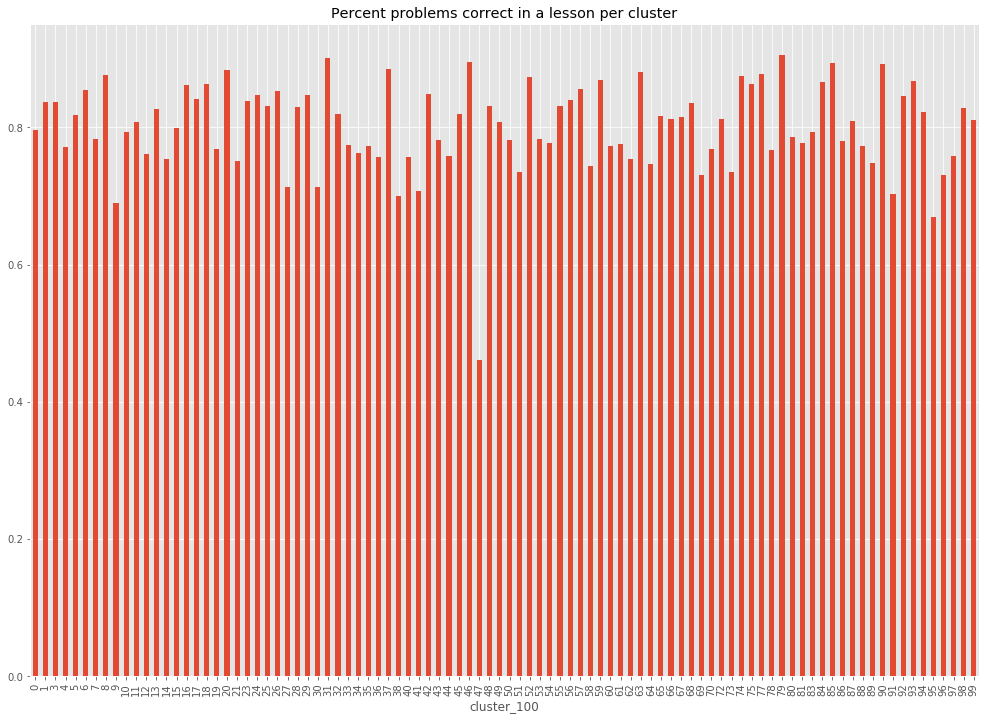

In [149]:
df_percent_prob_correct.plot.bar(figsize=(17,12), title='Percent problems correct in a lesson per cluster')

In [150]:
df_percent_correct_true = df_traits2p['percent_correct_true']

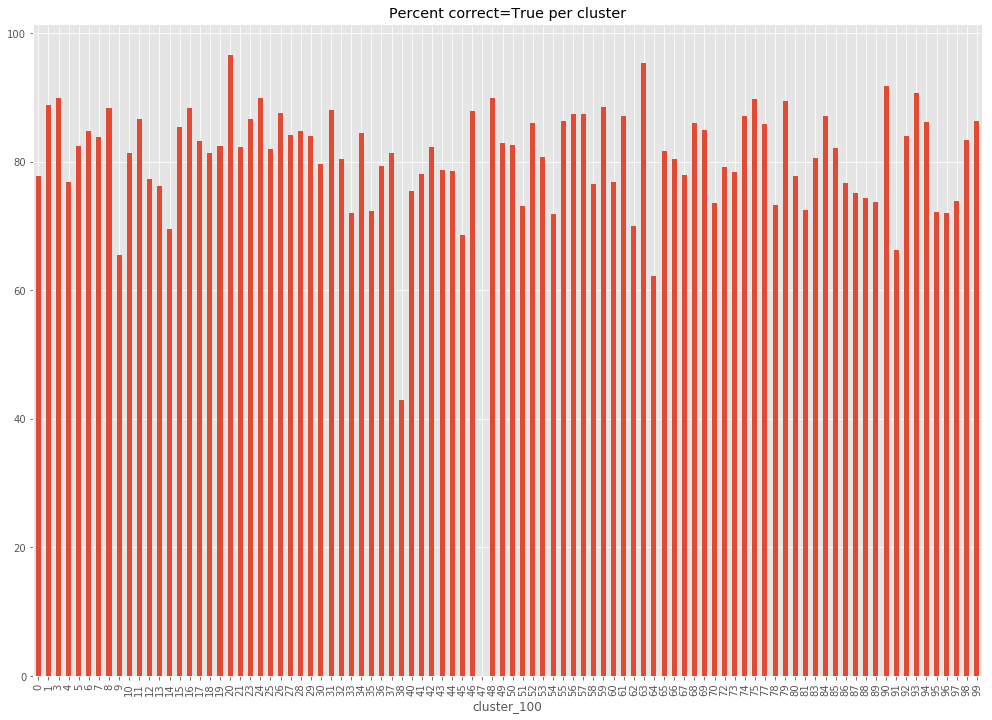

In [151]:
df_percent_correct_true.plot.bar(figsize=(17,12), title='Percent correct=True per cluster')

In [152]:
df_sample_size = df_traits2p['count']

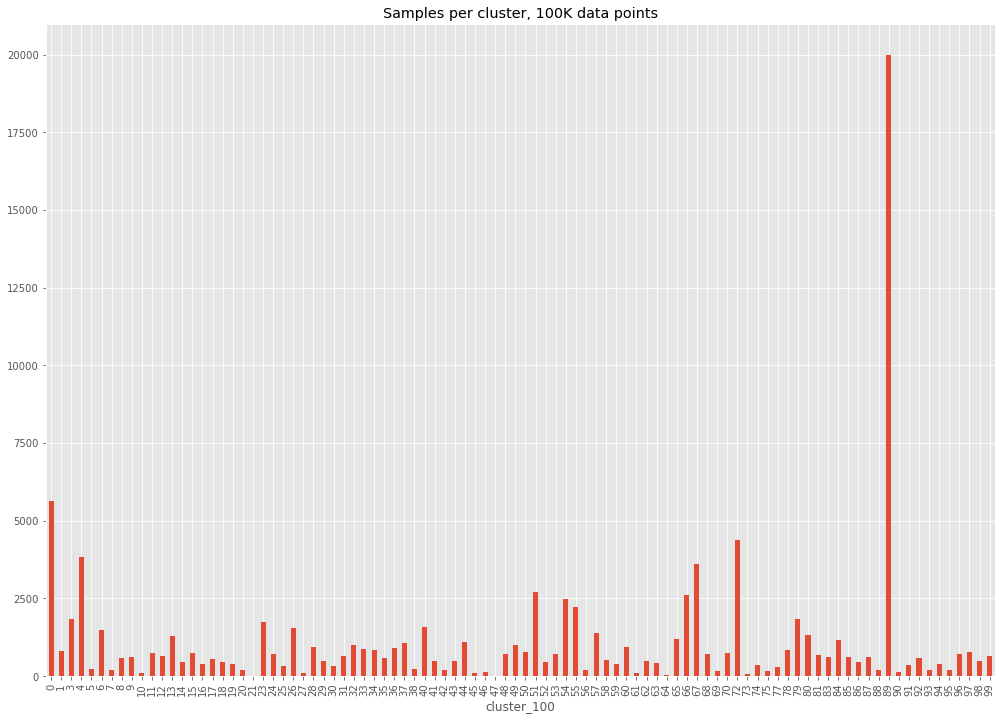

In [153]:
df_sample_size.plot.bar(figsize=(17,12), title='Samples per cluster, 100K data points')

In [154]:
df_trait_dict = df_traits.transpose().to_dict()

In [155]:
df_trait_dict_new = defaultdict()
for cluster in df_trait_dict:
    # print (cluster,df_trait_dict[cluster])
    df_trait_dict_new[cluster] = defaultdict()
    for trait in df_trait_dict[cluster]:
        # print (trait, df_trait_dict[cluster][trait])
        if df_trait_dict[cluster][trait] != 0:
            df_trait_dict_new[cluster][trait] = df_trait_dict[cluster][trait]
        

In [156]:
#df_trait_dict_new

In [157]:
sums = df_traits.sum()

In [158]:
df_traits_pct = df_traits/sums * 100.0

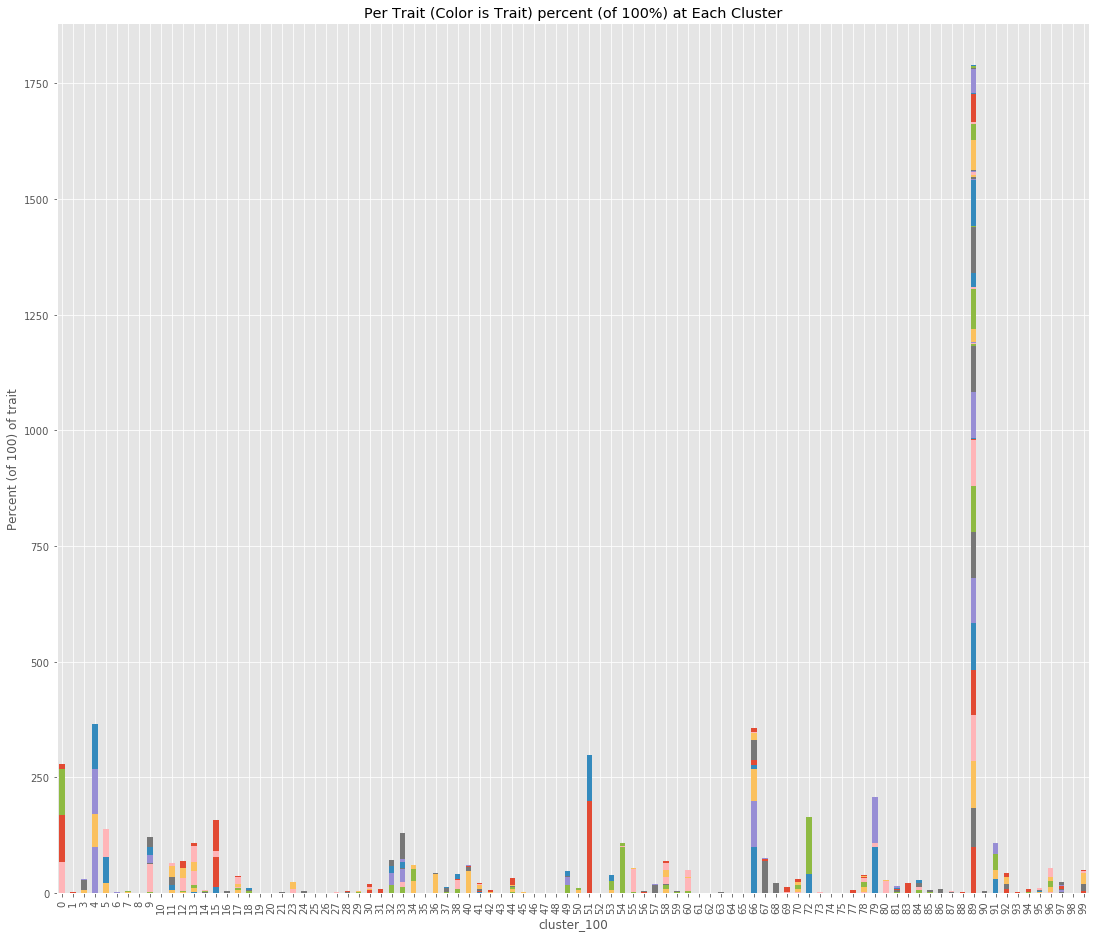

In [159]:
ax = df_traits_pct.plot.bar(stacked=True, figsize=(18.5, 16), legend=False, title='Per Trait (Color is Trait) percent (of 100%) at Each Cluster')
ax.set_ylabel("Percent (of 100) of trait")

In [160]:
df_traits_pct_dict = df_traits_pct.transpose().to_dict()

In [161]:
df_traits_pct_dict_new = defaultdict()

In [162]:
for cluster in df_traits_pct_dict:
    #print (cluster,df_traits_pct_dict[cluster])
    df_traits_pct_dict_new[cluster] = defaultdict()
    for trait in df_traits_pct_dict[cluster]:
        # print (trait, df_traits_pct_dict[cluster][trait])
        if df_traits_pct_dict[cluster][trait] > 5:
            df_traits_pct_dict_new[cluster][trait] = df_traits_pct_dict[cluster][trait]
        

In [163]:
df_traits_pct_dict_new

defaultdict(None,
            {0: defaultdict(None,
                         {'inverts_numerator_denominator': 67.593790426908157,
                          'modulo_ans': 100.0,
                          'numerator_off_by_one_nline': 100.0,
                          'simplifying_fractions': 8.8235294117647065}),
             1: defaultdict(None, {}),
             3: defaultdict(None,
                         {'determine_the_frac_part': 5.8823529411764701,
                          'how_to_model': 20.157068062827225}),
             4: defaultdict(None,
                         {'hops_vs_ticks': 98.636363636363626,
                          'identifying_gt_lt': 72.202423378474705,
                          'partitioning_number_line': 97.236180904522612,
                          'wrong_number_parts': 97.236180904522612}),
             5: defaultdict(None,
                         {'deci_hops_instead_ticks': 22.262773722627738,
                          'deci_point_location_correct': 55.2